In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:


import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils


df=pd.read_csv('gdrive/My Drive/fer2013.csv')

#print(df.info())
print(df["Usage"].value_counts())

# print(df.head())
x_train,y_train,x_test,y_test=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           x_train.append(np.array(val,'float32'))
           y_train.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           x_test.append(np.array(val,'float32'))
           y_test.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


features = 64
labels = 7
batch_size = 128
epochs = 25
width, height = 48, 48


x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')

y_train=np_utils.to_categorical(y_train, num_classes=labels)
y_test=np_utils.to_categorical(y_test, num_classes=labels)


#labels=7
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
x_train = np.array(x_train,'float32')
y_train = np.array(y_train,'float32')
x_test = np.array(x_test,'float32')
y_test = np.array(y_test,'float32')

y_train=np_utils.to_categorical(y_train, num_classes=labels)
y_test=np_utils.to_categorical(y_test, num_classes=labels)
x_train/=255
x_test/=255
y_test/=255
"""
x_train -=np.amin(x_train)

x_train /= np.amax(x_train)-np.amin(x_train)


x_test -=np.amin(x_test)

x_test /= np.amax(x_test)-np.amin(x_test)

"""
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)

x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

#3rd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(labels, activation='softmax'))

model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
         )


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")








Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
average_pooling2d_3 (Average (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 64)        36928     
_______________________________

ValueError: ignored

In [0]:
from google.colab import files
files.download("fer.h5")
files.download("fer.json")

In [0]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])


NameError: ignored

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from tabulate import tabulate
pred_list = []; actual_list = []
ssz=0

for i in y_test:
 
  actual_list.append(np.argmax(i))
  ssz+=1

for i in range(0,ssz):
 pred_list.append(np.argmax(y_train[i]))



results=confusion_matrix(actual_list, pred_list)
print (tabulate(results,headers=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']))
print()
print("presenting reports")
print()
print(classification_report(actual_list, pred_list))


  angry    disgust    fear    happy    sad    surprise    neutral
-------  ---------  ------  -------  -----  ----------  ---------
     60          8      67      118     74          54         86
     12          1       9       12      4           6         12
     73          2      75      126     86          57         77
    131         11     134      221    169          88        141
     87          7      85      174    103          72        125
     59         10      59      106     63          44         74
     89         10      87      146     98          60        117

presenting reports

              precision    recall  f1-score   support

           0       0.12      0.13      0.12       467
           1       0.02      0.02      0.02        56
           2       0.15      0.15      0.15       496
           3       0.24      0.25      0.25       895
           4       0.17      0.16      0.16       653
           5       0.12      0.11      0.11       415
      

In [0]:
print(model.history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


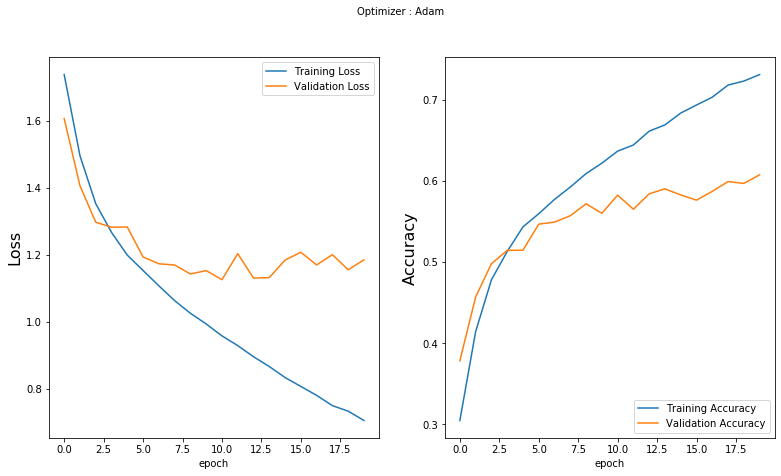

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,7))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('epoch')
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('epoch')
plt.plot(model.history.history['acc'], label='Training Accuracy')
plt.plot(model.history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()